In [1]:
import pandas as pd

In [2]:
athlete_merged=pd.read_csv('Cleaned_Olympic_Data.csv')

In [3]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

athlete_merged["Sex"]=lb.fit_transform(athlete_merged["Sex"])
athlete_merged["Season"]=lb.fit_transform(athlete_merged["Season"])



In [4]:
athlete_merged.head()

,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Event,Medal
0,1,24.0,180.0,80.0,China,CHN,1992,0,Barcelona,Basketball Men's Basketball,0
1,1,23.0,170.0,60.0,China,CHN,2012,0,London,Judo Men's Extra-Lightweight,0
2,1,24.0,175.0,70.0,Denmark,DEN,1920,0,Antwerpen,Football Men's Football,0
3,1,34.0,175.0,70.0,Denmark/Sweden,DEN,1900,0,Paris,Tug-Of-War Men's Tug-Of-War,1
4,0,21.0,185.0,82.0,Netherlands,NED,1988,1,Calgary,Speed Skating Women's 500 metres,0


* Remaining categorical data columns Team,NOC,YEAR,Season,City,Events.
* One option is to encode them using one hot encoding thechnique.
* But it increases number of columns and building a ML model on these columns would increase complexity.
* On the other hand we can encode every value in a cell based on its frquency of occurance.
* Through this we can avoid thousands of columns and ML model can be built easily 



In [5]:
#Creating dictionaries which consists Unique value of each column and their count.
team_dict=athlete_merged['Team'].value_counts().to_dict()
NOC_dict=athlete_merged['NOC'].value_counts().to_dict()
city_dict=athlete_merged['City'].value_counts().to_dict()
event_dict=athlete_merged['Event'].value_counts().to_dict()



In [6]:
# Mapping categorical columns with the frequency 
athlete_merged['Team']=athlete_merged['Team'].map(team_dict)
athlete_merged['NOC']=athlete_merged['NOC'].map(NOC_dict)
athlete_merged['City']=athlete_merged['City'].map(city_dict)
athlete_merged['Event']=athlete_merged['Event'].map(event_dict)


In [7]:
athlete_merged.head()

,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Event,Medal
0,1,24.0,180.0,80.0,4975,5141,1992,0,12977,3280,0
1,1,23.0,170.0,60.0,4975,5141,2012,0,22426,341,0
2,1,24.0,175.0,70.0,3424,3570,1920,0,4292,5733,0
3,1,34.0,175.0,70.0,6,3570,1900,0,7169,170,1
4,0,21.0,185.0,82.0,5718,5839,1988,1,2639,467,0


From the Medal column we can say that our outcome is categorical so we can apply following models on our data and select the one which gives high accuracy.
1) Logistic Regression Model. 
2) KNN(K nearest neighbour) Model.
3) Apply Random Forrest.


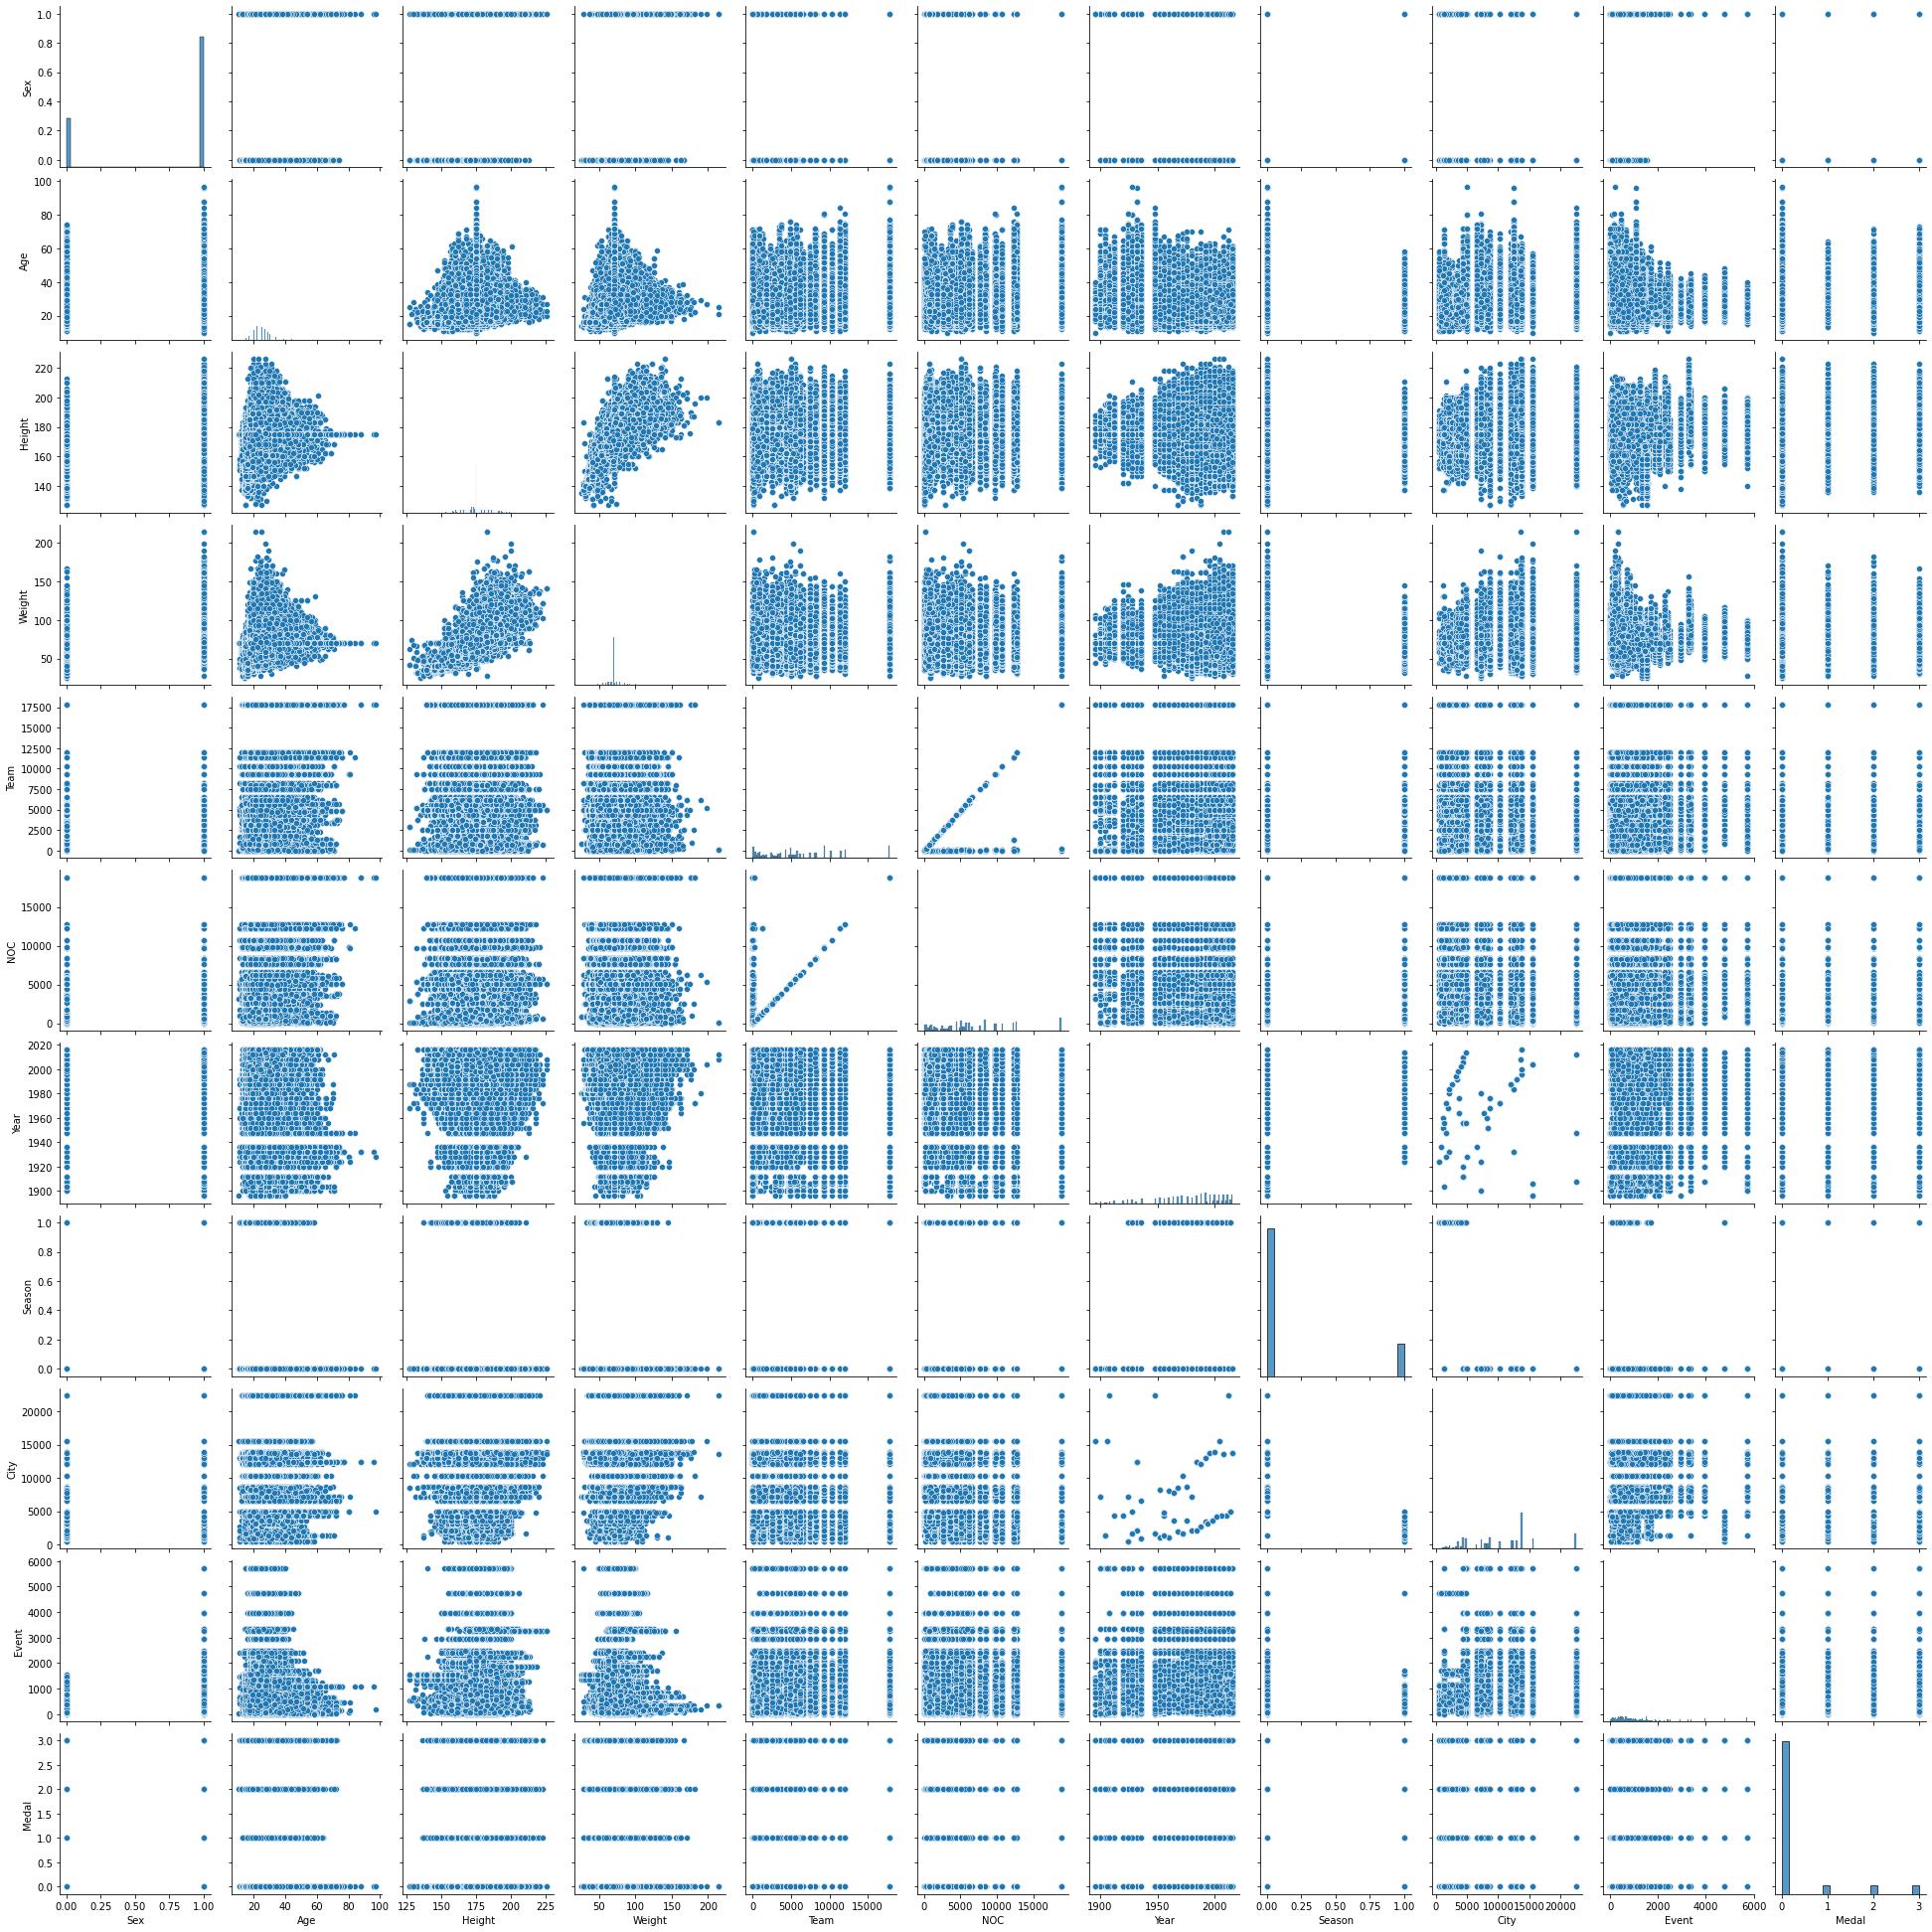

In [8]:

import seaborn as sns
sns.pairplot(athlete_merged)



* From the plot we can observe that there are many columns which doesn't have linear relationship with the other columns so we cannot apply linear regression model. Applying linear regression model for our data set would not give good prediction values.
* Intially, we'll apply linear regression model and see if the above identification is true or not. 
* Then we'll work on KNN model as it is less complex to build.
* Later, we'll work on Decision tree model, Random forrest model to check if we can achieve good efficiency.  



In [9]:
# Feature Selection

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt


In [10]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

X = athlete_merged.drop('Medal',axis=1)
Y = athlete_merged[['Medal']]


In [11]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=40)


C:\Users\Checkout\AppData\Local\Temp/ipykernel_36828/2886589814.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


Text(0.5, 0, 'Random Forest Feature Importance')

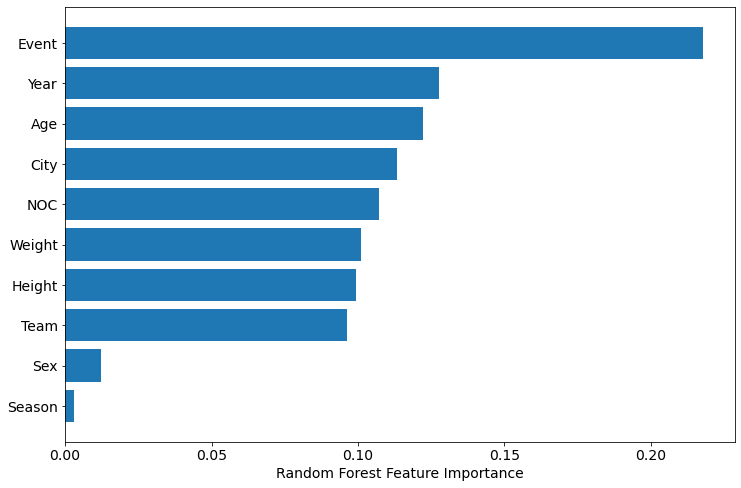

In [12]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, Y_train)
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")



In [14]:
# From the above graph it is clear that 2 columns "Sex" and "Season" have very less importance so we'll drop these two columns and train models on rest of the columns and find the efficiency.

X_train.drop(['Sex','Season'],axis=1,inplace=True)


C:\Users\Checkout\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Scaling

In [15]:

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train=pd.DataFrame(sc.fit_transform(X_train[['Age','Height','Weight','Team','NOC','Year','City','Event']]))
X_train.columns=['Age','Height','Weight','Team','NOC','Year','City','Event']
X_test=pd.DataFrame(sc.fit_transform(X_test[['Age','Height','Weight','Team','NOC','Year','City','Event']]))
X_test.columns=['Age','Height','Weight','Team','NOC','Year','City','Event']

In [16]:
X_train.head()

,Age,Height,Weight,Team,NOC,Year,City,Event
0,-1.032211,-0.027728,-0.041925,0.126779,0.025742,-2.421256,0.948796,-0.306844
1,-0.237809,-0.027728,-0.041925,1.282511,1.262441,-0.080003,-1.223527,0.347905
2,-0.873331,-2.181158,-1.713138,0.717071,0.673748,0.655820,-1.229725,-0.869291
3,0.079951,-1.104443,-1.076485,-1.173605,-1.217189,-0.347574,-0.321385,1.515931
4,0.238832,-0.027728,-0.041925,-0.230285,-0.269007,-0.481360,-1.223527,-0.033385


# Random Forest Model

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [18]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

C:\Users\Checkout\AppData\Local\Temp/ipykernel_36828/218825149.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


RandomForestClassifier()

In [20]:
# Perform prediction using the test dataset
y_pred = rf.predict(X_test)

In [21]:
cm=confusion_matrix(Y_test, y_pred)

Text(42.0, 0.5, 'Truth')

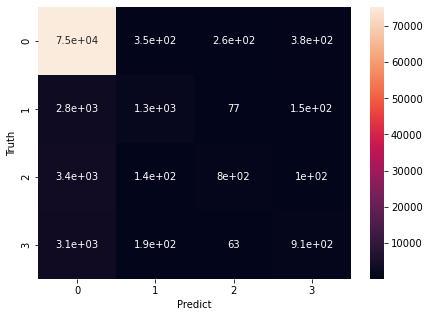

In [22]:
%matplotlib inline
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
sn.heatmap(cm,annot=True)
plt.xlabel("Predict")
plt.ylabel("Truth")

In [23]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     76272
           1       0.66      0.30      0.42      4403
           2       0.67      0.18      0.28      4486
           3       0.59      0.21      0.31      4308

    accuracy                           0.88     89469
   macro avg       0.70      0.42      0.49     89469
weighted avg       0.85      0.88      0.85     89469



In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred)

0.8755323072796164